In [652]:
import numpy as np
import pandas as pd
import seaborn as sns

from math import sqrt
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [677]:
data=pd.read_csv("train.csv")

In [678]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [679]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [680]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [681]:
data.Age.isnull().sum()

177

In [682]:
def PrepData(data) :
    data['Age'].fillna(data['Age'].mean(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    data['Fare'].fillna(data['Fare'].mode()[0], inplace=True)
    data['Sex'] = data['Sex'].replace({'female': 0, 'male': 1})
    data['Total_family'] = data['Parch'] + data['SibSp']
    data = data.astype({'Total_family': 'int8'})
    data = pd.get_dummies(data, columns=['Embarked'])

    x = data[['Age']]
    standard_normalization = preprocessing.StandardScaler()
    res = standard_normalization.fit_transform(x)
    data['Age']=res

    x = data[['Fare']]
    standard_normalization = preprocessing.StandardScaler()
    res = standard_normalization.fit_transform(x)
    data['Fare']=res
    return data

In [683]:
data=PrepData(data)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    int64  
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Total_family  891 non-null    int8   
 12  Embarked_C    891 non-null    uint8  
 13  Embarked_Q    891 non-null    uint8  
 14  Embarked_S    891 non-null    uint8  
dtypes: float64(2), int64(6), int8(1), object(3), uint8(3)
memory usage: 80.2+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Total_family,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.592481,1,0,A/5 21171,-0.502445,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.638789,1,0,PC 17599,0.786845,C85,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.284663,0,0,STON/O2. 3101282,-0.488854,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.407926,1,0,113803,0.420730,C123,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0.407926,0,0,373450,-0.486337,NaN,0,0,0,1


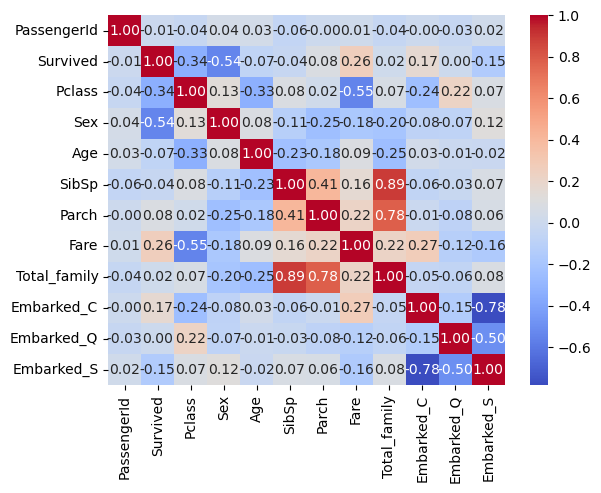

In [684]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

On voit que les caracteristiques Fare, Pclass et Sex influencent le taux de survie du passager. Les autres caractéristiques sont plutôt neutres. Nous allons toutes les garder sauf le passenger ID.

In [685]:
del data['Name']
del data['PassengerId']
del data['Ticket']

In [686]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Sex           891 non-null    int64  
 3   Age           891 non-null    float64
 4   SibSp         891 non-null    int64  
 5   Parch         891 non-null    int64  
 6   Fare          891 non-null    float64
 7   Cabin         204 non-null    object 
 8   Total_family  891 non-null    int8   
 9   Embarked_C    891 non-null    uint8  
 10  Embarked_Q    891 non-null    uint8  
 11  Embarked_S    891 non-null    uint8  
dtypes: float64(2), int64(5), int8(1), object(1), uint8(3)
memory usage: 59.3+ KB


In [692]:
X = data[['Pclass', 'Sex', 'Age', 'Total_family', 'Fare','Embarked_C','Embarked_Q','Embarked_S']]  # Colonnes à utiliser pour prédire
y = data['Survived']  # Cible : 'Survived'

In [688]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [689]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [690]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy*100:.2f}%")

Précision du modèle : 79.33%


In [691]:
def average_result(nb_run):
    total_accuracy = 0
    for i_run in range(nb_run):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i_run)  # random_state pour la reproductibilité
        
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        model = LogisticRegression()
        model.fit(X_train, y_train)

        # Faire des prédictions
        y_pred = model.predict(X_test)
        
        # Calculer la précision
        accuracy = accuracy_score(y_test, y_pred)
        total_accuracy += accuracy
        
        print(f"Précision du modèle pour l'exécution {i_run+1}: {accuracy*100:.2f}%")
    
    average_accuracy = total_accuracy / nb_run
    print(f"Moyenne de la précision après {nb_run} exécutions : {average_accuracy*100:.2f}%")

average_result(100)

Précision du modèle pour l'exécution 1: 81.01%
Précision du modèle pour l'exécution 2: 79.89%
Précision du modèle pour l'exécution 3: 78.21%
Précision du modèle pour l'exécution 4: 76.54%
Précision du modèle pour l'exécution 5: 83.24%
Précision du modèle pour l'exécution 6: 80.45%
Précision du modèle pour l'exécution 7: 87.15%
Précision du modèle pour l'exécution 8: 75.98%
Précision du modèle pour l'exécution 9: 75.42%
Précision du modèle pour l'exécution 10: 76.54%
Précision du modèle pour l'exécution 11: 82.12%
Précision du modèle pour l'exécution 12: 86.59%
Précision du modèle pour l'exécution 13: 79.33%
Précision du modèle pour l'exécution 14: 84.36%
Précision du modèle pour l'exécution 15: 80.45%
Précision du modèle pour l'exécution 16: 81.56%
Précision du modèle pour l'exécution 17: 73.74%
Précision du modèle pour l'exécution 18: 77.65%
Précision du modèle pour l'exécution 19: 84.92%
Précision du modèle pour l'exécution 20: 83.24%
Précision du modèle pour l'exécution 21: 82.12%
P

In [675]:
data=pd.read_csv("test.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [676]:
# Afficher les premières lignes du dataset
print(data.head())
   
data=PrepData(data)
X = data[['Pclass','Sex', 'Age', 'Total_family', 'Fare','Embarked_C','Embarked_Q','Embarked_S']]  # Colonnes à utiliser pour prédire
X = scaler.transform(X)

data['Survived'] = model.predict(X)

data[['PassengerId', 'Survived']].to_csv('predictions.csv', index=False)

print("Les prédictions ont été sauvegardées dans le fichier 'predictions.csv'.")


   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
Les prédictions ont été sauvegardées dans le fichier 'predictions.csv'.


# RandomForest Model

In [697]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data=pd.read_csv("train.csv")
data=PrepData(data)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Total_family,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.592481,1,0,A/5 21171,-0.502445,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.638789,1,0,PC 17599,0.786845,C85,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.284663,0,0,STON/O2. 3101282,-0.488854,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.407926,1,0,113803,0.420730,C123,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0.407926,0,0,373450,-0.486337,NaN,0,0,0,1


In [698]:
X = data[['Pclass','Sex', 'Age', 'Total_family', 'Fare','Embarked_S','Embarked_Q','Embarked_C']]  # Colonnes à utiliser pour prédire
y = data['Survived']  # Cible : 'Survived'

Text(0.5, 0, 'Variable Importance Levels')

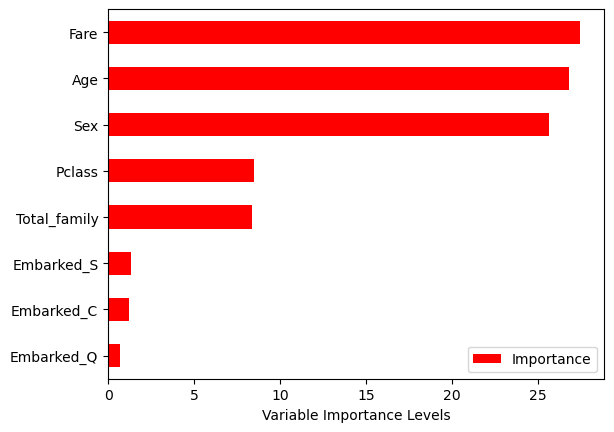

In [699]:
X= scaler.fit_transform(X)
# Instancier et entraîner le modèle
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X, y)

Importance = pd.DataFrame({"Importance": rf_model.feature_importances_*100},
                          index = ['Pclass', 'Sex', 'Age', 'Total_family', 'Fare','Embarked_S','Embarked_Q','Embarked_C'])
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Variable Importance Levels")

In [700]:
def average_result(nb_run):
    total_accuracy = 0
    for i_run in range(nb_run):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i_run)  # random_state pour la reproductibilité
        
        rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_model.fit(X_train, y_train)

        # Prédictions
        y_pred = rf_model.predict(X_test)
    
        # Évaluation
        accuracy = accuracy_score(y_test, y_pred)
        total_accuracy += accuracy
        
        print(f"Précision du modèle pour l'exécution {i_run+1}: {accuracy*100:.2f}%")
    
    average_accuracy = total_accuracy / nb_run
    print(f"Moyenne de la précision après {nb_run} exécutions : {average_accuracy*100:.2f}%")

average_result(100)

Précision du modèle pour l'exécution 1: 82.68%
Précision du modèle pour l'exécution 2: 77.09%
Précision du modèle pour l'exécution 3: 81.01%
Précision du modèle pour l'exécution 4: 79.33%
Précision du modèle pour l'exécution 5: 81.56%
Précision du modèle pour l'exécution 6: 83.24%
Précision du modèle pour l'exécution 7: 83.24%
Précision du modèle pour l'exécution 8: 77.65%
Précision du modèle pour l'exécution 9: 80.45%
Précision du modèle pour l'exécution 10: 77.09%
Précision du modèle pour l'exécution 11: 81.01%
Précision du modèle pour l'exécution 12: 84.92%
Précision du modèle pour l'exécution 13: 77.65%
Précision du modèle pour l'exécution 14: 82.12%
Précision du modèle pour l'exécution 15: 80.45%
Précision du modèle pour l'exécution 16: 78.77%
Précision du modèle pour l'exécution 17: 76.54%
Précision du modèle pour l'exécution 18: 81.01%
Précision du modèle pour l'exécution 19: 84.92%
Précision du modèle pour l'exécution 20: 86.03%
Précision du modèle pour l'exécution 21: 81.56%
P

In [701]:
data_test=pd.read_csv("test.csv")
print(data_test.head())

data_test=PrepData(data_test)
print(data_test.head())

X_test = data_test[['Pclass', 'Sex', 'Age', 'Total_family', 'Fare','Embarked_S','Embarked_Q','Embarked_C']]

X_test= scaler.transform(X_test)

data_test['Survived'] = rf_model.predict(X_test)

data_test[['Id', 'Survived']].to_csv('predictions_RandomForest.csv', index=False)

print("Les prédictions ont été sauvegardées dans le fichier 'predictions_RF.csv'.")

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
   PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    1   
1          893       3 

# XGBoost Model

In [575]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Charger les données d'entraînement (train.csv)
data_train = pd.read_csv("train.csv")

data_train=PrepData(data_train)

# Sélectionner les caractéristiques (features) et la cible (target)
X = data_train[['Pclass', 'Sex_female','Sex_male', 'Age', 'SibSp', 'Parch', 'Fare','Cabin','Embarked_C','Embarked_Q','Embarked_S']]
y = data_train['Survived']

# Normalisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instancier le modèle XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle avec les données d'entraînement
xgb_model.fit(X_train, y_train)

# Prédictions et évaluation sur l'ensemble de test
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Précision sur l'ensemble de test : {accuracy*100:.2f}%")

# Pour les prédictions sur le dataset de test (test.csv)
data_test = pd.read_csv("test.csv")

data_test=PrepData(data_test)

# Sélectionner les mêmes caractéristiques pour la prédiction
X_test_final = data_test[['Pclass', 'Sex_female','Sex_male', 'Age', 'SibSp', 'Parch', 'Fare','Cabin','Embarked_C','Embarked_Q','Embarked_S']]

# Normaliser les données de test avec le même scaler
X_test_final = scaler.transform(X_test_final)

# Faire les prédictions
predictions = xgb_model.predict(X_test_final)

# Sauvegarder les résultats dans un fichier CSV
output = pd.DataFrame({'PassengerId': data_test['PassengerId'], 'Survived': predictions})
output.to_csv('predictions_xgb.csv', index=False)

print("Les prédictions ont été sauvegardées dans le fichier 'predictions_xgb.csv'.")


Précision sur l'ensemble de test : 78.77%
Les prédictions ont été sauvegardées dans le fichier 'predictions_xgb.csv'.
